# Problem statement

Build a classifier to predict the outcome (Class) based on the features V1-V28 and Amount field. What is the accuracy of your model? Does anything look suspecious with the accuracy score?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, preprocessing, metrics, pipeline

from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

In [4]:
df = pd.read_csv("/data/creditcard-fraud.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [11]:
target = "Class"
X = df.iloc[:, 1:-1]
y = np.where(df[target] == 1, 1, 0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                    test_size = 0.3, random_state = 1) 

In [24]:
pd.Series(y_train).value_counts()/len(y_train)

0    0.998209
1    0.001791
dtype: float64

In [12]:
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

Recall score:  0.5777777777777777 
precision: 0.8297872340425532 
f1_score 0.6812227074235807


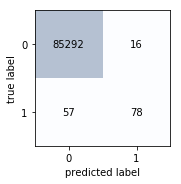

In [29]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob>=0.5, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("Recall score: ", metrics.recall_score(y_test, y_test_pred), 
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nf1_score", metrics.f1_score(y_test, y_test_pred))

Recall score:  0.7481481481481481 
precision: 0.7890625 
f1_score 0.7680608365019012


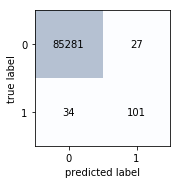

In [31]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob>=0.1, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("Recall score: ", metrics.recall_score(y_test, y_test_pred), 
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nf1_score", metrics.f1_score(y_test, y_test_pred))